In [ ]:
!pip install tensorflow==2.10.0

In [ ]:
# Clone repositori dataset gambar
!git clone https://github.com/Xavier9Neo/kbmobile.git

# Periksa folder dataset
import os

dataset_path = './kbmobile/animals/'  # Folder utama dataset
if os.path.exists(dataset_path):
    print("Dataset folder found!")
    print("Contents of dataset folder:", os.listdir(dataset_path))
else:
    print("Dataset folder not found.")


fatal: destination path 'kbmobile' already exists and is not an empty directory.
Dataset folder found!
Contents of dataset folder: ['moth', 'cow', 'starfish', 'coyote', 'fox', 'goldfish', 'bat', 'tiger', 'kangaroo', 'donkey', 'shark', 'flamingo', 'goat', 'wombat', 'woodpecker', 'fly', 'pig', 'cat', 'wolf', 'whale', 'rat', 'elephant', 'hummingbird', 'ladybugs', 'crow', 'hamster', 'snake', 'koala', 'orangutan', 'goose', 'leopard', 'ox', 'squid', 'eagle', 'grasshopper', 'turkey', 'mosquito', 'sheep', 'sparrow', 'mouse', 'dragonfly', 'panda', 'seahorse', 'gorilla', 'dolphin', 'seal', 'badger', 'horse', 'beetle', 'pigeon', 'sandpiper', 'squirrel', 'hornbill', 'raccoon', 'possum', 'antelope', 'hedgehog', 'cockroach', 'okapi', 'turtle', 'owl', 'penguin', 'bee', 'oyster', 'caterpillar', 'hyena', 'boar', 'lobster', 'chimpanzee', 'lion', 'hippopotamus', 'zebra', 'rhinoceros', 'lizard', 'octopus', 'otter', 'bison', 'pelecaniformes', 'bear', 'reindeer', 'crab', 'dog', 'duck', 'butterfly', 'hare', 

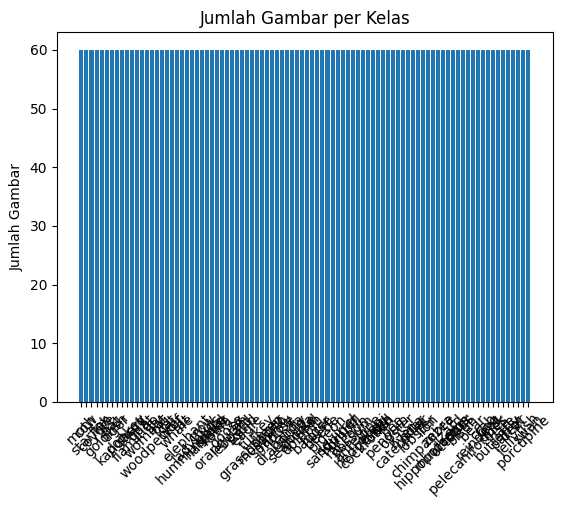

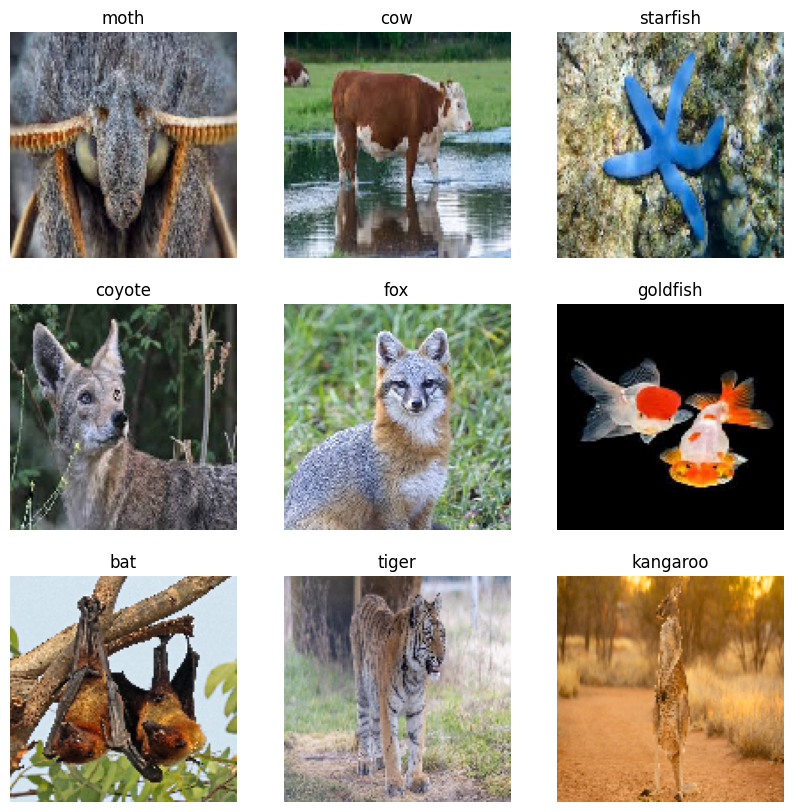

In [ ]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img


# Hitung jumlah gambar per kelas
classes = os.listdir(dataset_path)
class_counts = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in classes}

# Visualisasi jumlah gambar per kelas
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=45)
plt.title("Jumlah Gambar per Kelas")
plt.ylabel("Jumlah Gambar")
plt.show()

# Tampilkan beberapa sampel gambar
plt.figure(figsize=(10, 10))
for i, cls in enumerate(classes[:9]):
    sample_img_path = os.path.join(dataset_path, cls, os.listdir(os.path.join(dataset_path, cls))[0])
    img = load_img(sample_img_path, target_size=(128, 128))
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation dan Preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split untuk training/validation
)

# Dataset generators
batch_size = 32
target_size = (128, 128)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 4320 images belonging to 90 classes.
Found 1080 images belonging to 90 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Load MobileNetV2 tanpa lapisan output
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Bekukan lapisan awal (pre-trained weights)

# Tambahkan lapisan kustom
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')  # Output sesuai jumlah kelas
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Epoch 1/20
135/135 [==============================] - 88s 629ms/step - loss: 3.6538 - accuracy: 0.2046 - val_loss: 1.8337 - val_accuracy: 0.6111 - lr: 1.0000e-04
Epoch 2/20
135/135 [==============================] - 81s 603ms/step - loss: 1.4429 - accuracy: 0.6431 - val_loss: 1.1181 - val_accuracy: 0.7315 - lr: 1.0000e-04
Epoch 3/20
135/135 [==============================] - 79s 584ms/step - loss: 0.6713 - accuracy: 0.8213 - val_loss: 0.9577 - val_accuracy: 0.7556 - lr: 1.0000e-04
Epoch 4/20
135/135 [==============================] - 81s 600ms/step - loss: 0.3681 - accuracy: 0.9042 - val_loss: 0.8872 - val_accuracy: 0.7778 - lr: 1.0000e-04
Epoch 5/20
135/135 [==============================] - 80s 593ms/step - loss: 0.2249 - accuracy: 0.9410 - val_loss: 0.8196 - val_accuracy: 0.7787 - lr: 1.0000e-04
Epoch 6/20
135/135 [==============================] - 81s 596ms/step - loss: 0.1620 - accuracy: 0.9655 - val_loss: 0.8037 - val_accuracy: 0.7935 - lr: 1.0000e-04
Epoch 7/20
135/135 [========

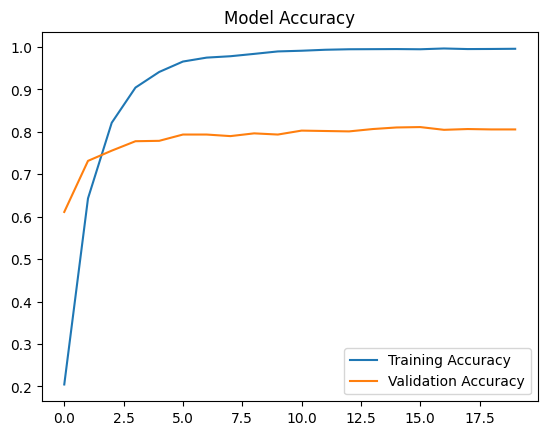

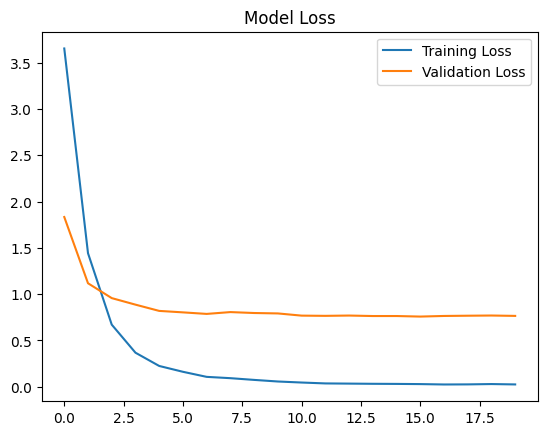

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)

# Training
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stopping, reduce_lr]
)

# Visualisasi training
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()


In [ ]:
# Evaluasi di dataset validasi
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc:.2f}")
print(f"Validation Loss: {val_loss:.2f}")

34/34 [==============================] - 15s 410ms/step - loss: 0.7656 - accuracy: 0.8056
Validation Accuracy: 0.81
Validation Loss: 0.77


Saving هذا يسمى حصان البحر.jpeg to هذا يسمى حصان البحر.jpeg
1/1 [==============================] - 0s 33ms/step
Predicted Class: seahorse


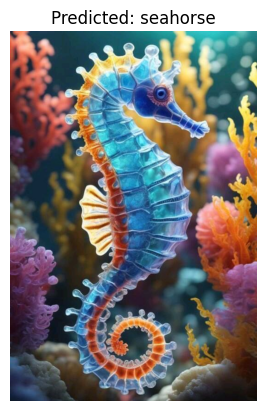

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from google.colab import files
import numpy as np

# Fungsi prediksi gambar
def predict_image(image_path):
    # Load dan preprocess gambar
    img = load_img(image_path, target_size=(128, 128))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Prediksi
    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions, axis=1)[0]
    class_labels = {v: k for k, v in train_generator.class_indices.items()}
    return class_labels[class_idx]

# Upload gambar
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Prediksi
predicted_class = predict_image(image_path)
print(f"Predicted Class: {predicted_class}")

# Tampilkan gambar
img = load_img(image_path)
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()

In [ ]:
# Simpan model setelah training
model.save('animal_classifier_model.h5')  # Simpan dalam format HDF5